<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Sampling from distributions
- Density estimation

<hr/>


<h1><font color="darkblue">Sampling and Density Estimation</font></h1>



### Descriptive Statistics
- Characterization of location, dispersion, etc.

| | Sample Estimates <font color="white">(notations)</font> | Probabilisty Density Functions   |
|--|--------------|-------------|
| **Average** | $\displaystyle\ \bar{x}=\frac{1}{N}\sum_{i=1}^N x_i = \big\langle x_i \big\rangle_{i=1}^N$ | $\displaystyle\ \mu = \mathbb{E}[X] =\!\int\!x\,p(x)\,dx$| 
| **Variance** | $\displaystyle\ s^2=\frac{1}{N\!-\!1}\sum_{i=1}^N \big(x_i\!-\!\bar{x}\big)^2 $|  $\displaystyle\ \mathbb{Var}[X] =\!\int\!(x\!-\!\mu)^2 p(x)\,dx$| 

- Useful connection to sampling

### Sampling from distributions

- Uniform between $a$ and $b$: scale and shift

>$\displaystyle U_{ab} = a + (b\!-\!a)\,U_{01} $

- Inverse transform sampling in $\mathbb{R}$

>$\displaystyle X = \mathrm{CDF}^{-1}(U_{01}) $
><br/>
> Unhomework: prove it!


<img src="files/inv.png" height="400" width="400" align=left>

- Rejection sampling - also works in $\mathbb{R}^N$

<img src="files/anim.gif" align=left>
<!--<img src="http://dl.dropbox.com/u/27415200/anim.gif">-->



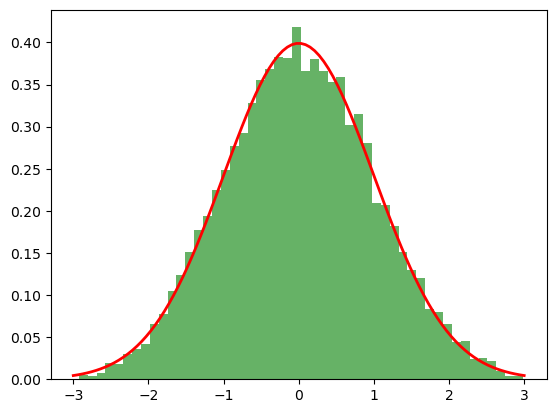

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Target distribution
target = norm(loc=0, scale=1)

# Proposal distribution: Uniform
proposal_min = -3
proposal_max = 3

# Scaling factor: maximum value of target distribution
c = target.pdf(0)

# Number of samples to draw
N = 10000

# Rejection sampling
samples = []
while len(samples) < N:
    # Draw a sample from the proposal distribution
    x_proposal = np.random.uniform(proposal_min, proposal_max)

    # Draw a uniform random number between 0 and c
    u = np.random.uniform(0, c)

    # Acceptance criterion
    if u <= target.pdf(x_proposal):
        samples.append(x_proposal)

# Plot the samples
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')

# Plot the target distribution
x = np.linspace(proposal_min, proposal_max, 100)
plt.plot(x, target.pdf(x), 'r', lw=2)

plt.show()


### Numerical Methods
If the $\left\{x_i\right\}$ set is sampled from the probability density function $p(\cdot)$,
the following will be true:
- Average

>$\displaystyle\mathbb{E}[X] =\!\int x\ p(x)\,dx  \ \approx\ \frac{1}{N}\sum_i x_i $

> Or a function of $x$
>
>$\displaystyle\mathbb{E}[f(X)] =\!\int f(x)\ p(x)\,dx  \ \approx\ \frac{1}{N}\sum_i f(x_i) $

- Variance

>$\displaystyle\mathbb{E}[(X\!-\!\mu)^2]=\int (x\!-\!\mu)^2\ p(x)\,dx \approx \frac{1}{N}\sum_i (x_i\!-\!\mu)^2$
><br/><br/>
> compare to
><br/><br/>
>$\displaystyle\ s^2=\frac{1}{N\!-\!1}\sum_{i=1}^N \big(x_i\!-\!\bar{x}\big)^2 $
><br/><br/>
> Bessel correction: $N\!-\!1$ independent $(x_i\!-\!\bar{x})$ differences
<br/><br/>
>$\displaystyle \sum_{i=1}^N (x_i\!-\!\bar{x}) =\ ???$ <font color="white">.... 0 ...</font>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
from scipy.stats import norm

In [4]:
# generate N samples
mu, sigma, N = 0, 1, 5

# pick a distribution
gauss = norm(mu, sigma)

# get random variates
x = gauss.rvs(N)

avg = x.mean()
print (f'avg: {avg}')

# variance estimates
s2   = np.sum( (x-avg)**2 ) /(N-1)  # corrected
s2n  = np.sum( (x-avg)**2 ) / N     # biased 
s2k  = np.sum( (x- mu)**2 ) / N     # known mean

print (f'''var: 
    {s2:.4f} corrected 
    {s2n:.4f} biased 
    {s2k:.4f} known mean
    ''') 

avg: 0.15166175869073142
var: 
    0.8149 corrected 
    0.6519 biased 
    0.6749 known mean
    


[[ 1.4879375  -0.4032364   1.33371416 ... -0.56576766  0.64398164
   1.75351447]
 [ 1.97534509 -0.05812193 -0.77267533 ... -1.09671726 -0.8549682
  -0.40421613]
 [-0.12873506  1.45905129  1.34097216 ... -0.4652812  -0.62658829
  -0.14094843]
 [ 0.76618994 -1.66473891 -0.40996049 ...  0.52537052 -0.03364674
   0.18188774]
 [-1.06853295 -0.8873801  -0.11093607 ... -0.16979439  1.22148673
  -0.92929441]]
(5, 100000) (100000,)
(100000,)
0.999502609848434 0.7996020878787471 1.0000209691981166


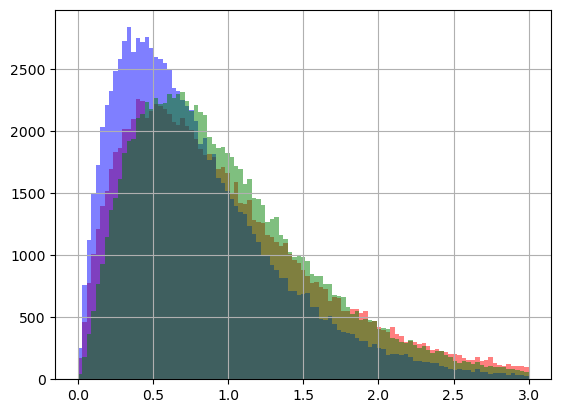

In [5]:
# generate M runs with N samples each
N, M = 5, 100000
X = gauss.rvs((N,M))
print(X)
avg = X.mean(axis=0)
print (X.shape, avg.shape)

# variance estimates - check out broadcasting in X-avg
s2   = np.sum( (X-avg)**2, axis=0) /(N-1) # correct
s2n  = np.sum( (X-avg)**2, axis=0) / N    # biased
s2k  = np.sum( (X- mu)**2, axis=0) / N    # known mean

print (s2.shape)

# averages
print (s2.mean(), s2n.mean(), s2k.mean())

plt.hist(s2 , 101, range=[0,3], color='r', alpha=0.5);
plt.hist(s2n, 101, range=[0,3], color='b', alpha=0.5);
plt.hist(s2k, 101, range=[0,3], color='g', alpha=0.5);
plt.grid()

### Density Estimation
- Histograms
    - Width of bins, $h$
    - Start of bin boundary, $x_0$

 >$\displaystyle \mathrm{Hist}(x) = \frac{1}{N}\sum_i \pmb{1}_{\mathrm{bin}(x_i;x_0,h)}(x)$
        
- Kernel Density Estimation (KDE)
    - Bandwidth $h$
   
 >$\displaystyle \mathrm{KDE}(x) = \frac{1}{N}\sum_i K_h(x\!-\!x_i) = \frac{1}{Nh}\sum_i K\left(\frac{x\!-\!x_i}{h}\right)$
   
  - Can use different $K(\cdot)$ kernel functions
    - E.g., Uniform, Triangular, Gauss, Epanechnikov

See animations at
http://www.mglerner.com/blog/?p=28


### Kernel Function
- Finite vs Infinite support
- Numerical evaluations
- Frequently used kernels

<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Kernels.svg" alt="All of the above kernels in a common coordinate system"  width="350" align=left>


Learn more about KDE 
[here](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/) and also check out Bayesian Blocks 
[here](https://jakevdp.github.io/blog/2012/09/12/dynamic-programming-in-python/)
<br>
&mdash; tutorials by Jake Vanderplas

### Detour: Dirac delta

- In the limit of $h\rightarrow{}0$, the kernel will become strange:

<img src="files/488px-Dirac_distribution_PDF.svg.png" align=right width=250>

> **Dirac's $\delta$** "function" is 0 everywhere except at 0 such that
<br/>
> $\displaystyle \int \delta(x)\,dx = 1$

- Interesting properties, e.g., 

> $\displaystyle \int f(x)\,\delta(x\!-\!a)\,dx = f(a)$

-  See **distribution theory** and **functionals** for more background

### An interesting result 

- Bad density estimation but if...

> $\displaystyle p(x) = \frac{1}{N} \sum_{i=1}^N \delta(x\!-\!x_i)$

- The expectation value

> $\displaystyle \mathbb{E}[X] =  \int x\, \frac{1}{N} \sum_{i=1}^N  \delta(x\!-\!x_i) \,dx$
> <br/><br/>
> $\displaystyle \mathbb{E}[X] = \frac{1}{N} \sum_{i=1}^N \int x\, \delta(x\!-\!x_i) \,dx$
><br/><br/>
> $\displaystyle \mathbb{E}[X] = \frac{1}{N} \sum_{i=1}^N x_i$



### Unhomework

1. Sample from a mixture of two Gaussians using uniform random numbers in the [0,1) interval. Try different $(\mu_1, \sigma_1)$ and $(\mu_2,\sigma_2$) values and different $w_1$ and $w_2$ weights!
1. Build different density estimators and compare to the original PDF. Try histogramming and KDE with different parameters.

In [6]:

import numpy as np

#(1.)

# Define the parameters for the two Gaussians
mu1, sigma1 = 0, 0.1  # mean and standard deviation
mu2, sigma2 = 0.5, 0.1  # mean and standard deviation

# Define the weights for the two Gaussians
w1, w2 = 0.6, 0.4  # weights

# Generate uniform random numbers
u = np.random.uniform(0, 1, 1000)

# Generate samples from the mixture of two Gaussians
samples = np.where(u < w1,
                   np.random.normal(mu1, sigma1, 1000),
                   np.random.normal(mu2, sigma2, 1000))

# Now 'samples' contains samples from the mixture of two Gaussians